In [ ]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('dataset/record3.csv')
df = df.drop(columns = ["Unnamed: 0"])
df.head(5)

,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,0,1,0.120767,0.141816,0.165580,0.096763,0.293453,0.286889,0.339334,0.333683,...,0.689164,0.513788,0.617464,0.657226,0.718965,0.633432,0.654975,0.631350,0.647792,0.587216
1,0,0,0.028176,0.079890,0.045178,0.033747,0.110553,0.114496,0.142236,0.148715,...,0.742457,0.778823,0.701140,0.843136,0.709873,0.644929,0.795295,0.819681,0.863674,0.681686
2,0,1,0.113842,0.172429,0.169520,0.106073,0.305486,0.302255,0.326779,0.348194,...,0.844415,0.601303,0.874120,0.631393,0.721548,0.588293,0.662454,0.604319,0.825337,0.610322
3,0,1,0.509087,0.562298,0.526602,0.434959,0.344575,0.341472,0.370844,0.354606,...,0.840854,0.705688,0.900185,0.731665,0.899969,0.696216,0.894956,0.736156,0.921240,0.718675
4,0,0,0.309344,0.504866,0.289992,0.252524,0.455995,0.452556,0.462556,0.465845,...,0.631186,0.762538,0.957835,0.819083,0.956548,0.578337,0.737608,0.573401,0.697133,0.858035


In [6]:
df_values = df.values
target = df_values[:, 0].astype(int)
attrs  = np.delete(df_values, 0, 1)

In [7]:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

attrs_train, attrs_test, target_train, target_test = train_test_split(attrs, target, test_size=0.33, random_state=42)

# Knn Classifier

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

[[ 9  5]
 [ 2 11]]
Accuracy: 0.7407407407407407
Precision:  0.6875
Recall:  0.8461538461538461
ROC AUC score:  0.8379120879120879


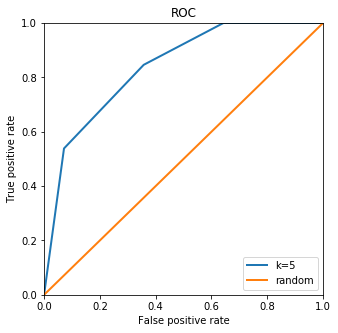

In [9]:
knn = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
knn.fit(attrs_train,target_train)
knn_prob = knn.predict_proba(attrs_test)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(target_test, knn_prob[:,1], pos_label=1, sample_weight=None)
target_pred = knn.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))
print("ROC AUC score: ", metrics.roc_auc_score(target_test,knn_prob[:,1], average='macro', sample_weight=None))

plt.figure(figsize=(5,5))
plt.plot(fpr_knn,tpr_knn,linewidth=2.0, label = "k=5")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Decision Tree Classifier

[[9 5]
 [4 9]]
Accuracy: 0.6666666666666666
Precision:  0.6428571428571429
Recall:  0.6923076923076923
ROC AUC score:  0.6675824175824175


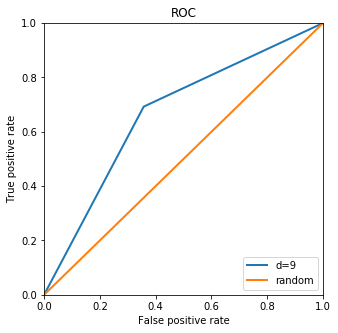

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 9)
tree.fit(attrs_train,target_train)
tree_prob = tree.predict_proba(attrs_test)
fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(target_test, tree_prob[:,1], pos_label=1, sample_weight=None)
target_pred = tree.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))
print("ROC AUC score: ", metrics.roc_auc_score(target_test,tree_prob[:,1], average='macro', sample_weight=None))

plt.figure(figsize=(5,5))
plt.plot(fpr_tree,tpr_tree,linewidth=2.0, label = "d=9")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Gaussian Naive Bayes Classifier

[[12  2]
 [ 2 11]]
Accuracy: 0.8518518518518519
Precision:  0.8461538461538461
Recall:  0.8461538461538461
ROC AUC score:  0.8983516483516483


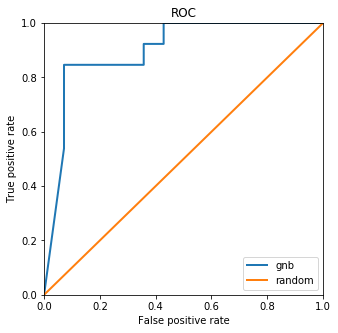

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
target_pred = gnb.fit(attrs_train, target_train).predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))


gnb_prob = gnb.predict_proba(attrs_test)
fpr_gnb, tpr_gnb, thresholds_gnb = metrics.roc_curve(target_test, gnb_prob[:,1], pos_label=1, sample_weight=None)
print("ROC AUC score: ", metrics.roc_auc_score(target_test,gnb_prob[:,1], average='macro', sample_weight=None))
plt.figure(figsize=(5,5))
plt.plot(fpr_gnb,tpr_gnb,linewidth=2.0, label = "gnb")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Logistic Regression

[[12  2]
 [ 3 10]]
Accuracy: 0.8148148148148148
Precision:  0.8333333333333334
Recall:  0.7692307692307693
ROC AUC score:  0.9120879120879121


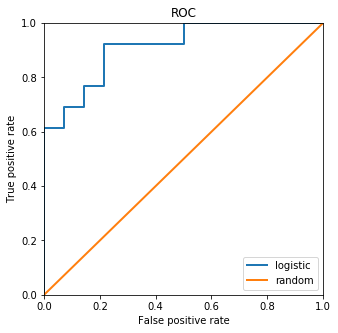

In [12]:
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression(random_state=0).fit(attrs_train, target_train)
target_pred = logi.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))


logi_prob = logi.predict_proba(attrs_test)
fpr_logi, tpr_logi, thresholds_logi = metrics.roc_curve(target_test, logi_prob[:,1], pos_label=1, sample_weight=None)
print("ROC AUC score: ", metrics.roc_auc_score(target_test,logi_prob[:,1], average='macro', sample_weight=None))
plt.figure(figsize=(5,5))
plt.plot(fpr_logi,tpr_logi,linewidth=2.0, label = "logistic")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Random Forest using Bagging

[[10  4]
 [ 2 11]]
Accuracy: 0.7777777777777778
Precision:  0.7333333333333333
Recall:  0.8461538461538461
ROC AUC score:  0.9120879120879121


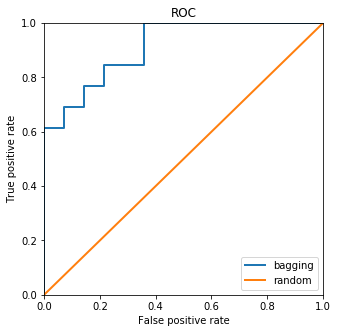

In [13]:
from sklearn import ensemble

bagging_dt=ensemble.BaggingClassifier (
    base_estimator=DecisionTreeClassifier(random_state=0,max_depth=11,min_samples_leaf=12), 
    n_estimators=300)
bagging_dt.fit(attrs_train,target_train)
target_pred = bagging_dt.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))
bagging_dt_prob = bagging_dt.predict_proba(attrs_test)
print("ROC AUC score: ",metrics.roc_auc_score(target_test,bagging_dt_prob[:,1], average='macro', sample_weight=None))

fpr_forest, tpr_forest, thresholds_forest = metrics.roc_curve(target_test, bagging_dt_prob[:,1], pos_label=1, sample_weight=None)
plt.figure(figsize=(5,5))
plt.plot(fpr_forest,tpr_forest,linewidth=2.0, label = "bagging")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Bagging Knn

[[11  3]
 [ 2 11]]
Accuracy: 0.8148148148148148
Precision:  0.7857142857142857
Recall:  0.8461538461538461
ROC AUC score:  0.9010989010989011


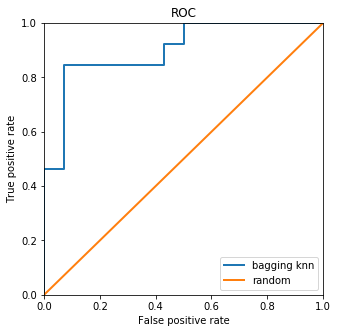

In [14]:
bagging_dt=ensemble.BaggingClassifier (
    base_estimator=KNeighborsClassifier(n_neighbors = 5, metric="euclidean"), 
    n_estimators=400)
bagging_dt.fit(attrs_train,target_train)
target_pred = bagging_dt.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))
bagging_dt_prob = bagging_dt.predict_proba(attrs_test)
print("ROC AUC score: ",metrics.roc_auc_score(target_test,bagging_dt_prob[:,1], average='macro', sample_weight=None))

fpr_bag_knn, tpr_bag_knn, thresholds_bag_knn = metrics.roc_curve(target_test, bagging_dt_prob[:,1], pos_label=1, sample_weight=None)
plt.figure(figsize=(5,5))
plt.plot(fpr_bag_knn,tpr_bag_knn,linewidth=2.0, label = "bagging knn")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Bagging Logistic Regression

[[12  2]
 [ 3 10]]
Accuracy: 0.8148148148148148
Precision:  0.8333333333333334
Recall:  0.7692307692307693
ROC AUC score:  0.9010989010989011


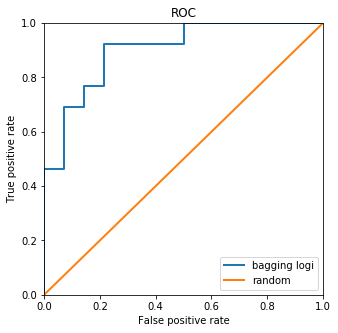

In [15]:
bagging_dt=ensemble.BaggingClassifier (
    base_estimator=LogisticRegression(random_state=0), 
    n_estimators=400)
bagging_dt.fit(attrs_train,target_train)
target_pred = bagging_dt.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))
bagging_dt_prob = bagging_dt.predict_proba(attrs_test)
print("ROC AUC score: ",metrics.roc_auc_score(target_test,bagging_dt_prob[:,1], average='macro', sample_weight=None))

fpr_bag_logi, tpr_bag_logi, thresholds_bag_logi = metrics.roc_curve(target_test, bagging_dt_prob[:,1], pos_label=1, sample_weight=None)
plt.figure(figsize=(5,5))
plt.plot(fpr_bag_logi,tpr_bag_logi,linewidth=2.0, label = "bagging logi")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Score of All Classifiers

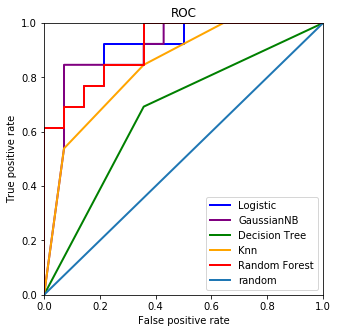

In [16]:
plt.figure(figsize=(5,5))
plt.plot(fpr_logi,tpr_logi,linewidth=2.0, label = "Logistic",color = "blue")
plt.plot(fpr_gnb,tpr_gnb,linewidth=2.0, label = "GaussianNB", color = "purple")
plt.plot(fpr_tree,tpr_tree,linewidth=2.0, label = "Decision Tree", color = "green")
plt.plot(fpr_knn,tpr_knn,linewidth=2.0, label = "Knn", color ="orange")
plt.plot(fpr_forest,tpr_forest,linewidth=2.0, label = "Random Forest", color = "red")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

Overall, bagging classifier using decision tree is the best. (roc score:0.97   accuracy:0.96)

Knn and Naive Bayes are the second best classifiers. (roc score:0.95   accuracy:0.92)

Bagging Knn doesn improve a lot on roc score. (roc score:0.99   accuracy:0.92)

Logistic regression is not good enough. (roc score:0.94   accuracy:0.85)

Bagging Logistic regression doesn't improve as well. (roc score:0.93   accuracy:0.85)

Single decision tree is the worst. (roc score:0.74   accuracy:0.74)

In [17]:
metrics.roc_auc_score(target_test,0.9*knn_prob[:,1]+0.8*logi_prob[:,1], average='macro', sample_weight=None)

0.8956043956043956